# Data Science with pandas (part 1)

Data analysis heavely depends on the characteristics of the chosen research subject, but we can still identify  main common data analysis steps as follows:
- Define the problem or objective (research question);
- Design/perform experiments and collect data;
- Data Exploration and Visualization;
- Data Cleaning and Preparation;
- Data Analysis and Modelling;
- Result Interpretation;
- Reporting and Visualization.

While tasks like finding a relevant research question and interpreting data are challenges for the critical and analytical skills of the single researcher, all the tasks related to data manipulation, from data reduction and statistical analysis to modelling and visualization, require a systematic use of a quite large variety of software. No need to say that implementing such software yourself from scratch would require a huge amount of time, without even mentioning all the issues related to software mantainance. Luckily for us, people have already devoloped software with specific tools for data analysis. These tools are organised into *packages* or *libraries*, they usually are openly available (according to the programming language you use), and they keep to be mantained and developed by a huge community of users. In particular, for python programmers, the most popular data analysis library is Pandas.

The python library <a url="https://pandas.pydata.org/about/">**Pandas**</a> is a popular open-source data analysis and data manupulation library for Python that started to be developed in 2008. The library is based on two main data structures: *Series* (1D, similar to numpy arrays) and *DataFrame* (2D labeled arrays). Why shall we use Series and DataFrame when we can work with numpy arrays and matrices? Because Pandas has been designed specifically for data manipulation and analysis tasks, providing tools and functions for data cleaning, data transformation, data aggregation, and data visualization, among other data-related tasks. Adopting Pandas, we can run through all the main technical tasks in our data analysis pipeline mainly using a single python library. 

Pandas is widely used in data science, machine learning, and data analysis tasks, as it provides powerful tools for data handling and manipulation, making it easier to work with a large variety of data. Furthermore, it well integrates with other Python libraries for data analysis, machine learning, and statistical analysis, such as NumPy, Scikit-Learn, and StatsModels. 

Overall, Pandas is a powerful and flexible library for data analysis and manipulation in Python, widely used in various domains including data science, finance, business, and research.

In this session we will explore the main features of Pandas going through the main steps of standard data analysis. For this purpose, we will be using data from the <a url="https://figshare.com/articles/dataset/Portal_Project_Teaching_Database/1314459">Portal Project Teaching Database</a>: real world example of life-history, population, and ecological data and, occasionally, small ad hoc dataset to exaplain DataFrame operations.

## Preliminaries

Before we start our journey into Pandas functionalities, there are some preliminary operations to run. 

The Pandas library is not native of python (it is not automatically loaded when you start running python), it needs to be installed and loaded. Assuming you already installed it, let's start importing the Pandas library and checking our installed version.

In [40]:
import pandas as pd
print(pd.__version__)

1.5.0.dev0+845.g9289c46e1


The path of our data files will be specified relatively to the main project folder, so,  in order to properly upload our dataset, it's important to check we are working in there. In order to do that, we will load another library, os, containing all sort of tools to interact with our operating system. The function ```os.getcwd()```, in particular, returns the current working directory (cwd).

In [3]:
import os
cwd = os.getcwd()
print(cwd)

/Volumes/Samsung_T5/uu_job/workshops/workshop-introduction-to-python/book


If the current local directory is <local_dir>/workshop-introduction-to-python, where <local_dir> is whatever directory you chose to download and unzip the course material, you are in the right place.

Let's store the relative path of our data into a variable and let's check if the data file actually exists using the function ```os.path.exists()```

In [41]:
data_file = 'data/surveys.csv'
print(os.path.exists(data_file))

True


If the result is True, we are all set up to go!

### Reading data and quick look (data exploration)

The very first operation we will perform is loading our data into a Pandas **DataFrame** (from now on, only DataFrame). A DataFrame is a Pandas *core object*, i.e. a key component that provides the primary functionality or core features of the entire library. We can convert our data into DataFrame using Pandas functions, they can read a quite large variety of formats like the *comma-separated values* (CSV) file format. In CSV files data values are separated by a comma (","), but files where values are separated by a semicolon (";"), space (" ") or tab ("\t") can also have a .csv extention. Once specified the spacer, Pandas can read all these files with the function ```pd.read_csv()```. The default spacer is a comma, so in our specific case there is no need to specify the separator.

In [42]:
surveys_df = pd.read_csv(data_file)

print(type(data_file))
print(type(surveys_df))

<class 'str'>
<class 'pandas.core.frame.DataFrame'>


The variable ```data_file``` is a string (a word) specifying the location of our file. We use it as the first argument of the function ```pd.read_csv()``` that, indeed, reads the file and returns a DataFrame. In Jupyter Notebook or Jupyter Lab you can visualise the DataFrame simply writing its name in a code cell and running the cell (in the same way you would display the value of any variable). Let's have a look at our just created DataFrame:

In [43]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


By looking at the DataFrame we can finally understand what a DataFrame actually is: a 2-dimensional data structure storing different types of variables in columns. Ever DataFrame has an Index (starting from 0) referring to the rows of the table. Columns can be addressed either by their names or by their index, where 0 corresponds to the very first column.

Jupyter does something else for us, it does not show the entire DataFrame as it is too big, instead it shows the first and last 5 rows separated by ... . Simply typing the name of our DataFrame in Jupyter is a great way to start looking at how our data looks like, get familiar with all the columns names, values, and type, and, most importantly, to check for the presence of the infamous NaN (not a number), as these not numeric values are the worst enemies of data analysis scripts.

<div class="alert alert-block alert-success">
<b>TRY IT YOURSELF:</b> Type the following commands and check out the outputs. Can you tell what each command does? What is the difference between commands with and without parenthesis?
</div>

```python
surveys_df.shape
surveys_df.columns
surveys_df.index
surveys_df.dtypes
surveys_df.head(<try_various_integers_here>)
surveys_df.tail(<try_various_integers_here>)
```

## Basic statistics

It's time to perform some basic statistics on our dataset. There is nothing to worry about, Pandas has been specifucally designed for data analysis, so Pandas datastructures have plenty of attributes and methods for our needs (you can always visualise detailed information about attributes and methods of any python object running ```help(<object>)```). Let's first visualise all the column names in the DataFrame

In [8]:
print(surveys_df.columns)

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')


We can use the loop statements we learned about this morning to print the DataFrame column one by one:

In [9]:
for column in surveys_df.columns:
    print(column)

record_id
month
day
year
plot_id
species_id
sex
hindfoot_length
weight


Let's select the column *weight* in our DataFrame and let's run some statistics on it

In [10]:
weight = surveys_df['weight']
print(type(weight))

<class 'pandas.core.series.Series'>


*weight* is another Pandas core object, a **Series**. You can think at a Series as a python list, or numpy array, with extra powers. One of these extra powers allows us to make a simple plot, just to have a first glance at the data. As this is the first plot of this session, we specify the command ```%matplotlib inline```, in this way jupyter lab or notebook will print the plot in the current notebook instead of opening a new window.

<AxesSubplot:ylabel='Frequency'>

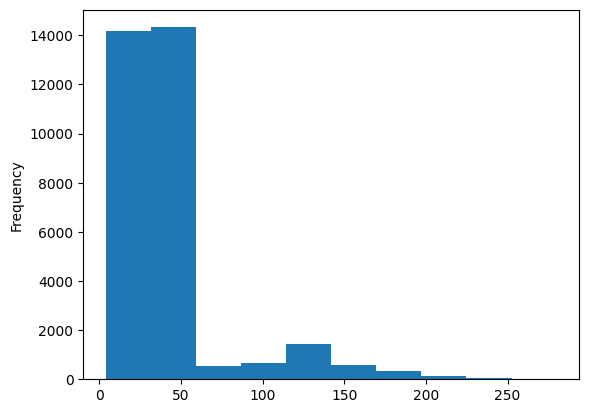

In [11]:
%matplotlib inline
weight.plot(kind='hist')

Did you notice how easy it was to obtain a summary plot of a column of our DataFrame? We can repeat the same for every column with a single line of code.

<AxesSubplot:ylabel='Frequency'>

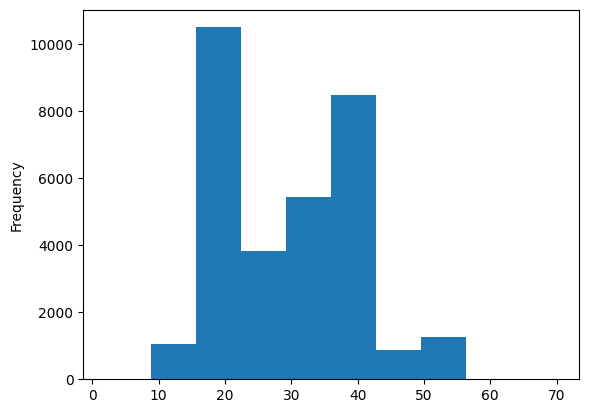

In [44]:
surveys_df['hindfoot_length'].plot(kind='hist')

<div class="alert alert-block alert-success">
<b>TRY IT YOURSELF:</b> Perform some basic statistics on the weight column. Can you tell what each method listed below does? Look at our explorative plot, does the statistics make sense?
</div>

```python
weight.min()
weight.max()
weight.mean()
weight.std()
weight.counts()
```

For each Series we have, instead of running the methods above one by one, we can obtain a statistical summary using the method ```.describe()```. Let's get a statistical summary for the weight column.

In [14]:
weight.describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

```.describe()``` is just one of the many Series and DataFrame methods. There are methods to remove duplicates, to sort values in a particular order, to filter data according to custom criteria, etc (you can always check the Pandas documentation for more information). One of these methods, ```.nunique()```, returns the number of unique elements in a Series. Comparing this number with the length of the Series allows us to check if all the values of a column are unique.

In [15]:
print(len(surveys_df['plot_id']))
print(surveys_df['plot_id'].nunique())

35549
24


In this case the column plot_id has only 24 unique elements, while the total number of elements (computed applying the function ```len()```) is 35549. We definetively have repeated values in that column. Checking if there are repeating elements in a DataFrame column is one of the most important operation in data analysis and introduces the next topic of this session: grouping.

## Grouping

Grouping is one of the most common operation in data analysis. Data often consists of measurements and our data files contain not only the measurement values but also all kind of characteristics/specifications relative to those measurement. When we load our data into a Pandas DataFrame, we usually have measurements in one column and all their different characteristics organized in the other columns. Such characteristics are rapresented by the red-dotted, green-dashed, and blu-long-dashed lines in the picture below. As you can see, in the Pandas DataFrame these measurement characteristics have no particular order.

Assuming you managed to arrange your data in a single DataFrame, you may be interested in computing statistics for *subsets* of data, where data subsets can be defined according to our measurement characteristics. If we think, for example, at rain measurements, these may be collected in different wind and temperature conditions, in different places, in different times, and by different researchers. All these characteristics represent variables that can be used for grouping: we can group data by date, to check how much it rained on a certain date, or by place, to check how much it rained in a specific town, or by both place and date. It is important to know that the TOTAL information in our DataFrame will be always the same, but *organising* the data by different charactersitics may help us to see patterns that otherwise would remain hidden. 

![Grouping sketch](pictures/grouping.jpeg)

In our specific case, we might be interested in calculating the average weight of all individuals per site or per sex. Once again, Pandas methods allow us to perform such operations with few lines of code.

In [16]:
grouped_data = surveys_df.groupby('sex')
print(type(grouped_data))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


The result of applying the method ```groupby()``` is not a "classic" Pandas DataFrame, but another Pandas object, a *DataFrameGroupBy*. This tells us that this specific DataFrame has been the result of a grouping operation. Contrary to the classic DataFrame, we cannot visualise the characteristics of this DataFrame simply running a cell with its name in it, but we can have a look at its statistical characteristics using a method we already introduced in the previous paragraphs: ```.describe()```.

In [17]:
surveys_df.describe()

,record_id,month,day,year,plot_id,hindfoot_length,weight
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,31438.000000,32283.000000
mean,17775.000000,6.474022,16.105966,1990.475231,11.397001,29.287932,42.672428
std,10262.256696,3.396583,8.256691,7.493355,6.799406,9.564759,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,21.000000,20.000000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,32.000000,37.000000
75%,26662.000000,9.000000,23.000000,1997.000000,17.000000,36.000000,48.000000
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,70.000000,280.000000


In [18]:
grouped_data.describe()

record_id                                                               \
        count          mean           std  min      25%      50%       75%   
sex                                                                          
F     15690.0  18036.412046  10423.089000  3.0  8917.50  18075.5  27250.00   
M     17348.0  17754.835601  10132.203323  1.0  8969.75  17727.5  26454.25   

                month            ... hindfoot_length         weight  \
         max    count      mean  ...             75%   max    count   
sex                              ...                                  
F    35547.0  15690.0  6.583047  ...            36.0  64.0  15303.0   
M    35548.0  17348.0  6.392668  ...            36.0  58.0  16879.0   

                                                         
          mean        std  min   25%   50%   75%    max  
sex                                                      
F    42.170555  36.847958  4.0  20.0  34.0  46.0  274.0  
M    42.995379  36.184981  4.0  20.0  39.0  49.0  280.0  

[2 rows x 56 columns]

While on a classic DataFrame ```.describe()``` returns statistical information per column, on a DataFrameGroupBy it will return statistical information per group, in our case sex

<div class="alert alert-block alert-success">
<b>TRY IT YOURSELF:</b> 
    <ul>
        <li>Try to run the method <code>.mean()</code> on your DataFrameGroupBy. Can you tell what do you get?</li>
        <li>What happens when you group by two columns (<code>.groupby(['plot_id', 'sex'])</code>) and you apply the method <code>.mean()</code> on your DataFrameGroupBy?</li>
    </ul>
</div>


Another very useful outcome of grouping is the possibility of performing selective counting. For example, let's see how to count the number of records per species. We just need to remember that each species has a unique ID and that records are identified by another ID stored in the column record ID. We will first group our data according to the species ID and then, for each group, we will count the number of records. Several consecutive operations that, once again, Pandas allows us to execute in a single line.

In [20]:
grouped_species_counts = surveys_df.groupby('species_id')['record_id'].count()
print(type(grouped_species_counts))
grouped_species_counts

<class 'pandas.core.series.Series'>


species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64

Even if the result of our counting is a Series, we can still visualise it in a 2D plot. Indeed, a Pandas Series is a *labeled* 1D data structure, this means that to each data element of the Series it is assigned both a label and an index. Applying the ```.plot()``` method to our result will generate a plot with data labels (species ID) on the X-axis and counts on the Y-axis.

<AxesSubplot:xlabel='species_id'>

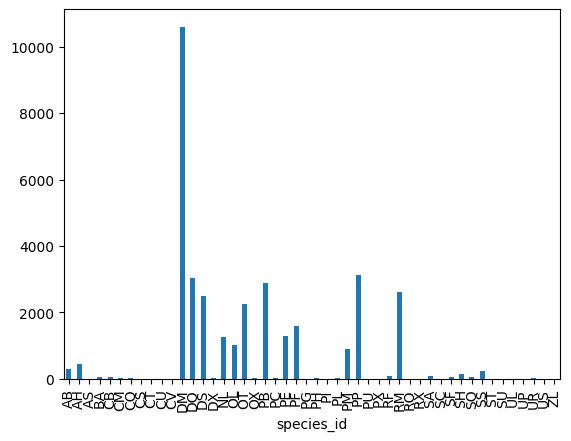

In [23]:
grouped_species_counts.plot(kind='bar')

## Indexing, Slicing, and Subsetting DataFrames

We saw that using grouping we can conveniently subset our DataFrame according to different measurement characteristics. However, sometimes it is necessary to "surgically" extract small portions of DataFrame such us single rows and columns of data satisfying very specific filtering criteria. In this paragraph we will see how Pandas allows to perform all these operations with a quite intuitive syntax.

### Selecting 

Let's look again at our original DataFrame columns using a loop. This time we will add some extra conditional statements to highlight the column name corresponding to a specific index.

In [25]:
sel_index = 5
print('Index) Column name')
for i,col in enumerate(surveys_df.columns):
    if i == sel_index:
        print('{}) {} <==='.format(i,col))
    else:
        print('{}) {}'.format(i,col))

Index) Column name
0) record_id
1) month
2) day
3) year
4) plot_id
5) species_id <===
6) sex
7) hindfoot_length
8) weight


We already saw in one of the previous paragraph how to extract a specific DataFrame column, but we did not go too much into details. The next block of code shows how to retrieve the same column (specied_id corresponding to index 5) from our DataFrame:

In [29]:
#By name
# --------------------------------------
#Method1
plot_id_1 = surveys_df['species_id']

#Method2
plot_id_2 = surveys_df.species_id
# --------------------------------------

#By location
# --------------------------------------
#Method3
plot_id_3 = surveys_df[surveys_df.columns[5]]

#Method4
plot_id_4 = surveys_df.iloc[:,5]
# --------------------------------------

In the first two methods we extract the column specifying its name. The third method is substantially identical to the first one as the 6th (index 5) element of the Series ```surveys_df.columns``` is species_id. The fourth method uses the method ```iloc``` to select *all* the rows of the 6th column. 

### Selecting data by type

The attributes ```dtypes``` contains information about the data types contained in each column.

In [15]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

This information is not only important for our data analysis, but it also allows us to eventually select subset of data according to its type.

In [31]:
surveys_df_float_sel = surveys_df.select_dtypes(include = ['float64'])
print(type(surveys_df_float_sel))
surveys_df_float_sel.dtypes

<class 'pandas.core.frame.DataFrame'>


hindfoot_length    float64
weight             float64
dtype: object

In the previous block of code we used a method, ```.select_dtypes()```, to select the DataFrame columns storing only float64 values (double-precision floating point numbers).

### Selecting by string in name

Another very convenient option to select data is specifying a string that must be contained in the column names. DataFrame column names are indicative (or at least, they should be) of the characteristics relative to measurements. All the columns containing a unique identifier, for example, may contain the suffix "id" while all the measurements relative to a specific body part (another example) will most probably contain that body part name as well. In this context, the Pandas method ```.filter(like=<str>)``` will allow to extract only those columns containing a certain string in their names. 
For example, let's extract all columns containing some sort of ID:

In [33]:
print(surveys_df.columns)

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')


In [34]:
surveys_df_str_sel = surveys_df.filter(like='_id')
print(type(surveys_df_str_sel))

<class 'pandas.core.frame.DataFrame'>


In [35]:
surveys_df_str_sel.head()

,record_id,plot_id,species_id
0,1,2,NL
1,2,3,NL
2,3,2,DM
3,4,7,DM
4,5,3,DM


### Slicing

DataFrame slicing allows you to extract a portion of a DataFrame based on conditions or indices and create a new DataFrame containing only the subset of data that you are interested in. In Pandas slicing can be perfomed using the methods ```loc``` and '''iloc''' for slicing via names and indices, respectively. To remember the difference between the two, just notice that the "i" in ```iloc``` stands for "index".
Let's start slicing our initial DataFrame into a 3x4 sub-DataFrame:

In [36]:
surveys_df.iloc[0:3,0:4]

,record_id,month,day,year
0,1,7,16,1977
1,2,7,16,1977
2,3,7,16,1977


<div class="alert alert-block alert-warning">
<b>WARNING:</b> In Python integer indexing starts with 0 and, when slicing using a continous range of indices, data corresponding to the last index is NOT included.
</div>

We can obtain the same result using ```loc```, but we need to specify a list with the first 4 column names.

In [37]:
surveys_df.loc[[0,1,2],['record_id','month','day','year']]

,record_id,month,day,year
0,1,7,16,1977
1,2,7,16,1977
2,3,7,16,1977


<div class="alert alert-block alert-success">
<b>TRY IT YOURSELF:</b> Can you tell what happens when you execute the following commands?
</div>

- ```surveys_df[0:1]```;
- ```surveys_df[:4]```;
- ```surveys_df[:-1]```.



<div class="alert alert-block alert-success">
<b>TRY IT YOURSELF:</b> What happens when you call the following commands? How are the two commands different?
</div>

- ```surveys_df.iloc[0:4, 1:4]```;
- ```surveys_df.loc[0:4, 1:4]```.


### Subsetting Data according to user-defined criteria

We can extract subsets of our DataFrame following the general syntax ```data_frame[<condition_on_data>]```. <condition_on_data> is a conditional statement on the DataFrame content itself. You may think at the conditional statement as a question or query you ask to your DataFrame. Here there are some examples:

In [70]:
# What are the data collected in 2002?
surveys_df[surveys_df.year == 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
33320,33321,1,12,2002,1,DM,M,38.0,44.0
33321,33322,1,12,2002,1,DO,M,37.0,58.0
33322,33323,1,12,2002,1,PB,M,28.0,45.0
33323,33324,1,12,2002,1,AB,NaN,NaN,NaN
33324,33325,1,12,2002,1,DO,M,35.0,29.0
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [50]:
# What are the data NOT collected in 2002?
surveys_df[surveys_df.year != 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
33315,33316,12,16,2001,11,NaN,NaN,NaN,NaN
33316,33317,12,16,2001,13,NaN,NaN,NaN,NaN
33317,33318,12,16,2001,14,NaN,NaN,NaN,NaN
33318,33319,12,16,2001,15,NaN,NaN,NaN,NaN


In [51]:
# What are the data NOT collected in 2002? (different syntax)
surveys_df[~(surveys_df.year == 2002)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
33315,33316,12,16,2001,11,NaN,NaN,NaN,NaN
33316,33317,12,16,2001,13,NaN,NaN,NaN,NaN
33317,33318,12,16,2001,14,NaN,NaN,NaN,NaN
33318,33319,12,16,2001,15,NaN,NaN,NaN,NaN


Our filtering conditions may be very specific, they can target different columns in the DataFrame, and they can be combined using the logical operator "&":

In [52]:
# What are the data collected between 2000 and 2002 on female species?
surveys_df[(surveys_df.year >= 2000) & (surveys_df.year <= 2002) & (surveys_df.sex == 'F')]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
30158,30159,1,8,2000,1,PP,F,22.0,17.0
30160,30161,1,8,2000,1,PP,F,21.0,17.0
30164,30165,1,8,2000,1,PP,F,22.0,15.0
30168,30169,1,8,2000,2,PB,F,25.0,24.0
30171,30172,1,8,2000,2,NL,F,30.0,137.0
...,...,...,...,...,...,...,...,...,...
35539,35540,12,31,2002,15,PB,F,26.0,23.0
35540,35541,12,31,2002,15,PB,F,24.0,31.0
35541,35542,12,31,2002,15,PB,F,26.0,29.0
35542,35543,12,31,2002,15,PB,F,27.0,34.0


The method ```isin()``` allows to specify a range of "permitted" values for a certain column. Here it follows another example:

In [39]:
surveys_df[(surveys_df.year == 2000) & (surveys_df.sex == 'F') & (surveys_df.month.isin([1,3,4]))]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
30158,30159,1,8,2000,1,PP,F,22.0,17.0
30160,30161,1,8,2000,1,PP,F,21.0,17.0
30164,30165,1,8,2000,1,PP,F,22.0,15.0
30168,30169,1,8,2000,2,PB,F,25.0,24.0
30171,30172,1,8,2000,2,NL,F,30.0,137.0
...,...,...,...,...,...,...,...,...,...
30708,30709,4,31,2000,13,OT,F,20.0,29.0
30709,30710,4,31,2000,14,OT,F,20.0,32.0
30714,30715,4,31,2000,14,PP,F,21.0,16.0
30715,30716,4,31,2000,3,PB,F,24.0,35.0


<div class="alert alert-block alert-success">
<b>TRY IT YOURSELF:</b> 
    <ol>
    <li> Create a new DataFrame that only contains observations with sex values that are not female or male. Print the number of rows in this new DataFrame. Verify the result by comparing the number of rows in the new DataFrame with the number of rows in the surveys DataFrame where sex is null.</li>
    <li>Create a new DataFrame that contains only observations that are of sex male or female and where weight values are greater than 0.</li>
    </ol>
</div>

## DataFrame Cleaning

A simple exploration of our DataFrame showed us that there are columns full of invalid values (NaN). One of the most important preliminary operations of data analysis is cleaning your data set, i.e. "getting rid" of non numerical values. Now that we mastered selecting, slicing, and subsetting, we can easily clean our DataFrame with few lines of code.

In [80]:
# Are there any invalid values in the weight column?
n_tot = len(surveys_df)
n_null_weight = len(surveys_df[pd.isnull(surveys_df.weight)])
n_pos_weight  = len(surveys_df[surveys_df.weight > 0])

print('Total number of rows:',n_tot)
print('Number of null weight rows:',n_null_weight)
print('Number of positive weight rows:',n_pos_weight)

Total number of rows: 35549
Number of null weight rows: 3266
Number of positive weight rows: 32283


As you can see, out of 35549 weight measurements, 3266 are not usable. The remaining 32283 values are positive, so usable, values. What happens if we compute the mean weight ignoring the fact that there are not numeric values?

In [48]:
ave_weight = surveys_df.weight.mean()
print(ave_weight)

42.672428212991356


A smooth run, without errors or warnings. As we said several times, Pandas is a library designed for data analysis and when performing data analysis it is very common to deal with not numeric values. In particular, the ```.mean()``` method has an argument called *skipna* that when set TRUE (default value, so we do not need to specify it) excludes NA/null values. This means that, in this case, Pandas simply ignores whatever it is not numeric and it performs computations only on numeric values.

If we are not happy with Pandas default behaviour, we can manually decide which value to assigni to NA/null values. One possible choice is setting them to zero. To do that, we just need to apply the method ```.fillna(<value>)```, where <value> is the number we want to substitute to the NA/null value (in our case, 0).

In [83]:
cleaned_weight1 = surveys_df.weight.fillna(0)
cleaned_weight_ave1 = cleaned_weight1.mean()
print(cleaned_weight_ave1)

38.751976145601844


You probably noticed that compared to our previous mean computation, the result it's pretty different. This is because the mean is now computed on a sample with many more zeros compared to the previous one and, as a result, the value of the computed mean is smaller.
Conscious of this problem, we may now choose a more appropriate value to "fill" our NA/null values. How about we use the "clean" mean of our first computation?

In [49]:
cleaned_weight2 = surveys_df.weight.fillna(surveys_df.weight.mean())
cleaned_weight_ave2 = cleaned_weight2.mean()
print(cleaned_weight_ave2)

42.672428212991356


This time we obtain exactly the same result of our first computation, this is because we substituted the NA/null values with a mean computed excluding the NA/null values.

<div class="alert alert-block alert-success">
<b>TRY IT YOURSELF:</b> Compute the average weight of data after having cleaned the weight and the sex column.
</div>